# Laboratorio 2

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Problema 1

Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

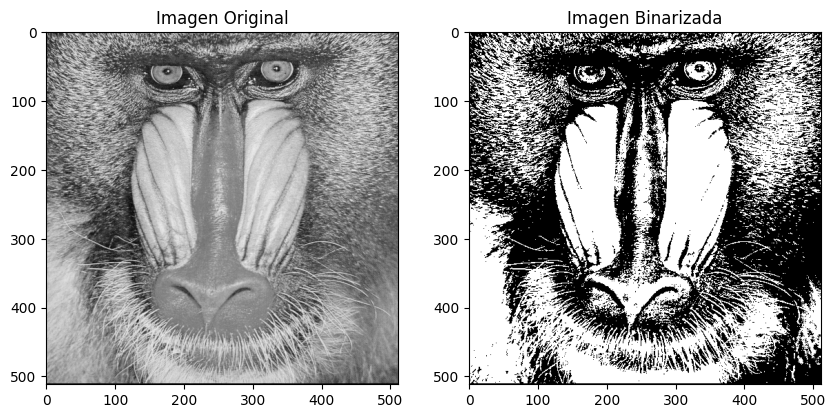

In [11]:
# Umbralado global
def binarizar_imagen(imagen, umbral=127):
    
    # Leer la imagen en escala de grises
    img_gris = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar el umbralado global
    _, imagen_binaria = cv2.threshold(img_gris, umbral, 255, cv2.THRESH_BINARY)
    
    return imagen_binaria

# carga de la imagen
img = 'mandril.tiff'  # Cambia esta ruta por la de tu imagen
imagen_binaria = binarizar_imagen(img, umbral=127)

# Mostrar la imagen original y la binarizada
img_original = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(img_original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Imagen Binarizada")
plt.imshow(imagen_binaria, cmap='gray')

plt.show()

## Problema 2
Desarrolle una función que dada dos imagenes que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imgenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [39]:
imgp21 = cv2.imread("mandril.tiff", cv2.COLOR_BGR2RGB)
imgp22 = cv2.imread("peppers.tiff", cv2.COLOR_BGR2RGB)


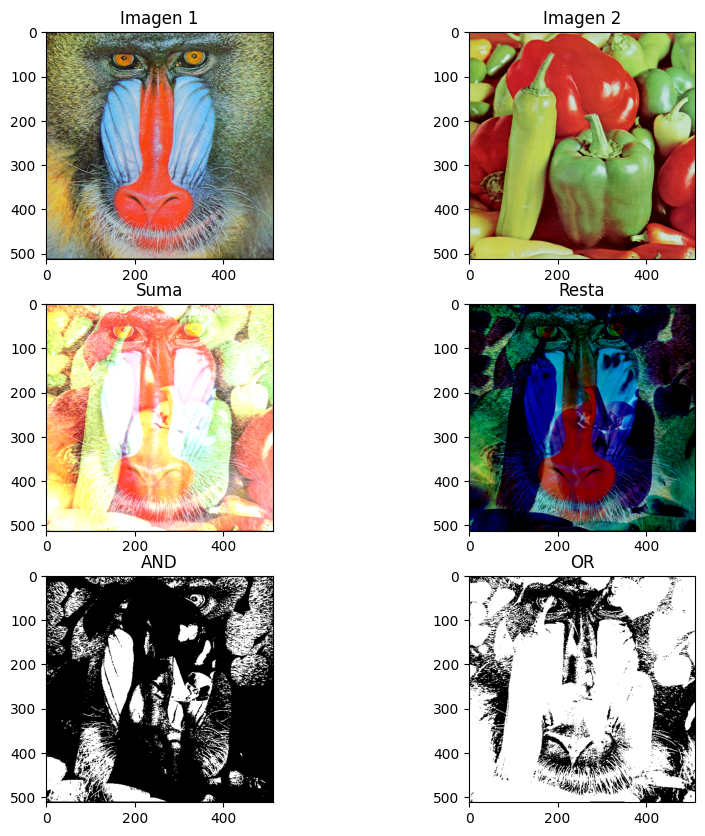

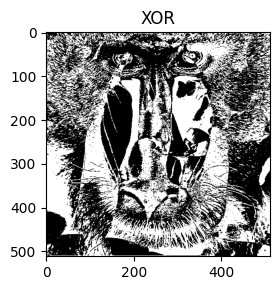

In [56]:
def binarizar_imagen(imagen_gris, umbral=127):

    _, imagen_binaria = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)
    return imagen_binaria

def operaciones_imagenes(imgp21, imgp22):
            
    img1_gray = cv2.cvtColor(imgp21, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(imgp22, cv2.COLOR_BGR2GRAY)

    img1_bin = binarizar_imagen(img1_gray)
    img2_bin = binarizar_imagen(img2_gray)

    suma = cv2.add(imgp21, imgp22)
    resta = cv2.subtract(imgp21, imgp22)

    and_img = cv2.bitwise_and(img1_bin, img2_bin)
    or_img = cv2.bitwise_or(img1_bin, img2_bin)
    xor_img = cv2.bitwise_xor(img1_bin, img2_bin)

    plt.figure(figsize=(10, 10))

    plt.subplot(3, 2, 1)
    plt.title("Imagen 1")
    plt.imshow(cv2.cvtColor(imgp21, cv2.COLOR_BGR2RGB))

    plt.subplot(3, 2, 2)
    plt.title("Imagen 2")
    plt.imshow(cv2.cvtColor(imgp22, cv2.COLOR_BGR2RGB))

    plt.subplot(3, 2, 3)
    plt.title("Suma")
    plt.imshow(cv2.cvtColor(suma, cv2.COLOR_BGR2RGB))

    plt.subplot(3, 2, 4)
    plt.title("Resta")
    plt.imshow(cv2.cvtColor(resta, cv2.COLOR_BGR2RGB))

    plt.subplot(3, 2, 5)
    plt.title("AND")
    plt.imshow(and_img, cmap='gray')

    plt.subplot(3, 2, 6)
    plt.title("OR")
    plt.imshow(or_img, cmap='gray')

    plt.figure(figsize=(6, 3))
    plt.title("XOR")
    plt.imshow(xor_img, cmap='gray')

    plt.tight_layout()
    plt.show()

operaciones_imagenes(imgp21, imgp22)



## Problema 3
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

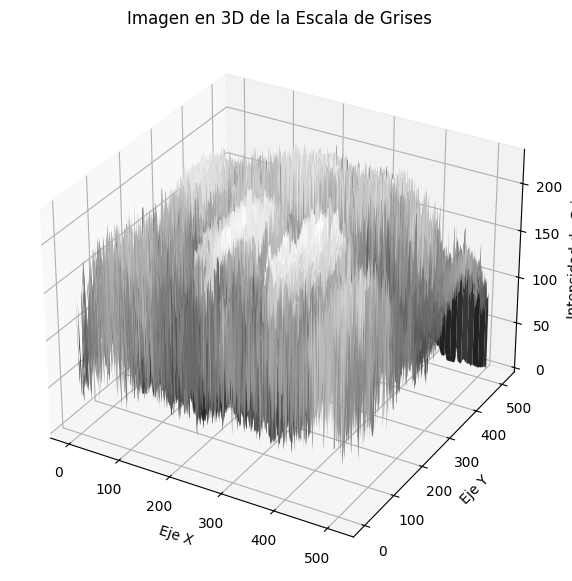

In [77]:
from mpl_toolkits.mplot3d import Axes3D

def mostrar_imagen_3d(imgp3):
   
    img_gris = cv2.imread(imgp3, cv2.IMREAD_GRAYSCALE)

    filas, columnas = img_gris.shape

    # Coordenadas X e Y
    X, Y = np.meshgrid(range(columnas), range(filas))
    
    # Crear la figura y el eje 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie
    ax.plot_surface(X, Y, img_gris, cmap='gray')

    # Etiquetas de los ejes
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad de Gris')

    # Mostrar la gráfica
    plt.title('Imagen en 3D de la Escala de Grises')
    plt.show()


imgp3 = 'mandril.tiff' 
mostrar_imagen_3d(imgp3)


## Problema 4
Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

### Negativa

In [78]:
def negativa(imagen):
  
    return 255 - imagen


### Lineal

In [79]:
def lineal(imagen, c=1.0, b=0):
   
    return np.clip(c * imagen + b, 0, 255).astype(np.uint8)


### Logarítmica

In [80]:
def logaritmica(imagen, c=1.0):

    imagen = imagen.astype(np.float32)
    return np.clip(c * np.log1p(imagen), 0, 255).astype(np.uint8)


### Exponencial

In [81]:
def exponencial(imagen, c=1.0, gamma=1.0):

    imagen = imagen.astype(np.float32) / 255.0
    return np.clip(c * np.power(imagen, gamma) * 255, 0, 255).astype(np.uint8)


### Pruebas

In [113]:
imgp5 = 'mandril.tiff'  
imagen_gris_1 = cv2.imread(imgp5, cv2.IMREAD_GRAYSCALE)

(-0.5, 511.5, 511.5, -0.5)

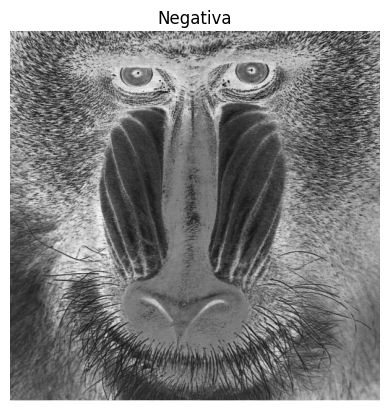

In [115]:
imagen_negativa = negativa(imagen_gris_1)
plt.figure()
plt.imshow(imagen_negativa, cmap='gray')
plt.title('Negativa')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

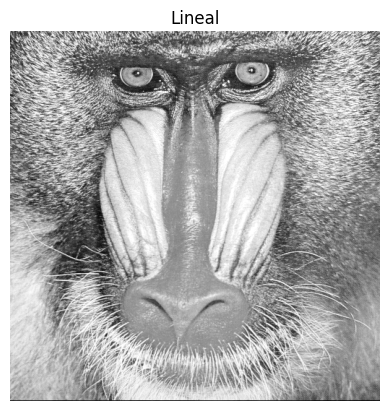

In [117]:
imagen_lineal = lineal(imagen_gris_1, c=1.2, b=10)
plt.figure()
plt.imshow(imagen_lineal, cmap='gray')
plt.title('Lineal')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

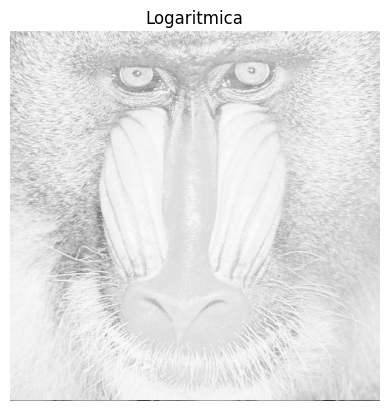

In [118]:
imagen_logaritmica = logaritmica(imagen_gris_1, c=30)
plt.figure()
plt.imshow(imagen_logaritmica, cmap='gray')
plt.title('Logaritmica')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

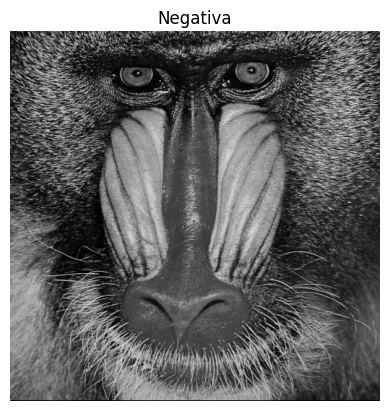

In [119]:
imagen_exponencial = exponencial(imagen_gris_1, c=1, gamma=2)
plt.figure()
plt.imshow(imagen_exponencial, cmap='gray')
plt.title('Negativa')
plt.axis('off')

## Problema 5

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

### Kernel Laplaceano

El kernel Laplaciano es una técnica que se utiliza en el procesamiento de imagenes para detectar bordes y características de una imagen. Para ello utiliza el operador Laplaciano.

Este es un operador que calcula la segunda derivada de la intensidad de la imagen y lo que busca el kernel es resaltar las áreas con alta variación en la intensidad de los píxeles.

Para detectar estos cambios abruptos, lo que hace el kernel es que aplica la convolución de la imagen utilizando una matriz:

[[0,-1,0]

[-1,4,-1]

[0,-1,0]]

Este kernel es sencillo de usar pero puede ser sensible a ruido en la imagen, distorsionando los resultados.

### Algoritmo de Canny

Es un enfoque más avanzado para detección de bordes. Incluye varias etapas para mejorar la precisión y reducir el ruido, lo cual es beneficioso para un mejor resultado y es muy utilizado porque esta detección la hace de manera precisa y continua.

#### Etapas del algoritmo

1. Filtrado con Gaussian blur: Se aplica un filtro gaussiano con el objetivo de suavizar la imagen y con ello reducir el ruido que afecta la detección de bordes.
2. Cálculo del gradiente: Se calculan los gradientes en las ejes X e Y para poder determinar la magnitud y dirección del borde. Se utilizan operadores de Sobel.
3. Supresión de No-Máximos: Se aplica una técnica para eliminar los píxeles que no son máximos en la dirección del gradiente. Con ello se mantienen solo los bordes más prominentes.
4. Umbral de Histeresis: Se utiliza un umbral doble para identificar bordes fuertes y débiles. Lo que busca es que este proceso identifique en donde están conectados los bordes fuertes con los débiles.

Las principales diferencias con el Laplaceano son:

- Complejidad: El Laplaceano es bastante simple y directo por lo que se podría considerar más facil de usar, mientras que el algoritmo de Canny es más complejo ya que utiliza diferentes etapas para suavizar, detectar y refinar resultados.
- Precisión: El Laplaceano es más sensible al ruido y podría provocar errores en el proceso, mientras que el de Canny es más preciso y por lo tanto menos sensible a ruido, dando un mejor resultado de la imagen.
- Robustez: El Laplaceano es menos robusto, consume menos recursos pero puede ser no el ideal en imagenes con mucho ruido o cambios de iluminación, mientras que el de Canny es ideal para este tipo de casos.

La elección de uno u otro dependerá mucho de lo que se desea hacer y de los recursos disponibles, siendo posible utilizar el Laplaciano para casos más sencillos y el de Canny para casos más complejos.

